<span style="color:red;font-size:25px">
    Import the required libraries
</span>

In [1]:
from bs4 import BeautifulSoup
import requests

<span style="color:red;font-size:25px">
    Import Selenium for browser automation
</span>

In [10]:
# Selenium is required for clicking buttons
from selenium import webdriver
# webdriver will click the buttons by controlling chrome
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito') # to open incognito window
options.add_argument('--headless') # without actually opening the chrome window
driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)

C:\Users\Ashish Singh\AppData\Local\Temp\ipykernel_26276\1415379409.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)
C:\Users\Ashish Singh\AppData\Local\Temp\ipykernel_26276\1415379409.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)


In [11]:
# using By.CLASS_NAME will give error so we have to import it
from selenium.webdriver.common.by import By

In [12]:
# now we need to click the required button on the page and get the html content of that 
# so this block will clik and then give the page to beautifulsoup for scraping 

import time

driver.get("https://www.ted.com/talks/julia_dhar_how_to_have_constructive_conversations?trk=public_post-text")

# use xpath when same class or id is used for buttons. otherwise you will get invalidselectorexception error
more_buttons = driver.find_elements(By.XPATH, '//*[@id="maincontent"]/div/div/div/div/div[3]/div[1]/button')

# for clicking the found botton
for x in range(len(more_buttons)):
  if more_buttons[x].is_displayed():
      driver.execute_script("arguments[0].click();", more_buttons[x])
      time.sleep(1)
page_source = driver.page_source

In [13]:
import lxml

In [14]:
# now comes the work of beautifulsoup
soup = BeautifulSoup(page_source, "html.parser")

In [15]:
main = soup.find('div', class_ = "mb-10 w-full")

In [16]:
transcripts = main.find('div', class_ = "w-full")

In [17]:
print(transcripts)

<div class="mx-auto mb-10 w-full"><div class="flex justify-between"><h4><span class="text-lg font-bold">Transcript</span> <span class="text-sm font-normal">(19 Languages)</span></h4><div><button type="button"><i aria-hidden="true" class="icon-more-horizontal"></i></button></div></div><div class="mt-4 w-full"><div class="max-w-64 w-full"><div class="css-x1eoxi"><svg class="css-h3zlkk" viewbox="0 0 15 10"><path d="M7.44 7.266l5.625-5.984a1.015 1.015 0 011.501 0 1.191 1.191 0 010 1.6l-6.373 6.78a1.016 1.016 0 01-1.466.034L.31 2.887c-.208-.22-.31-.513-.31-.8s.102-.58.31-.8a1.015 1.015 0 011.501 0l5.63 5.98z" fill="currentColor"></path></svg><select class="rounded-sm css-wbqv41" data-testid="transcript__language-dropdown"><option value="id">Bahasa Indonesia</option><option value="en">English</option><option value="es">Español</option><option value="fr">Français</option><option value="lt">Lietuvių kalba</option><option value="hu">Magyar</option><option value="pl">Polski</option><option value

In [18]:
transcripts_each = transcripts.find_all('div', class_ = "mb-6 w-full")

In [19]:
print(len(transcripts_each))

15


In [20]:
speech_block = []
for i in range(len(transcripts_each)):
    speech_block.append(transcripts_each[i].span.text)


In [21]:
print(speech_block)

["Three planes, 25 hours, 10,000 miles. My dad gets off a flight from Australia\nwith one thing in mind and it's not a snack or a shower or a nap. It's November 2016 and Dad is here to talk to Americans\nabout the election. Now, Dad's a news fiend, but for him, this is not just red or blue,\nswing states or party platforms. He has some really specific intentions. He wants to listen,\nbe heard and understand. ", "And over two weeks,\nhe has hundreds of conversations with Americans from\nNew Hampshire to Miami. Some of them are tough conversations, complete differences of opinions, wildly different worldviews, radically opposite life experiences. But in all of those interactions, Dad walks away\nwith a big smile on his face and so does the other person. You can see one of them here. And in those interactions, he's having a version\nof what it seems like we have less of, but want more of -- a constructive conversation. ", "We have more ways than ever to connect. And yet, politically, ideo

In [22]:
single_text = " ".join(speech_block)

In [23]:
print(single_text)

Three planes, 25 hours, 10,000 miles. My dad gets off a flight from Australia
with one thing in mind and it's not a snack or a shower or a nap. It's November 2016 and Dad is here to talk to Americans
about the election. Now, Dad's a news fiend, but for him, this is not just red or blue,
swing states or party platforms. He has some really specific intentions. He wants to listen,
be heard and understand.  And over two weeks,
he has hundreds of conversations with Americans from
New Hampshire to Miami. Some of them are tough conversations, complete differences of opinions, wildly different worldviews, radically opposite life experiences. But in all of those interactions, Dad walks away
with a big smile on his face and so does the other person. You can see one of them here. And in those interactions, he's having a version
of what it seems like we have less of, but want more of -- a constructive conversation.  We have more ways than ever to connect. And yet, politically, ideologically, it fe

In [24]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [25]:
from PIL import Image
import numpy as np

In [26]:
discard = STOPWORDS

#### masking image first with black and white image

## THis is important cell to convert color image to binary image

In [27]:
# first we need to make the binary image of the color image using pillow
image_file = Image.open("ted-logo-fb.png") # open colour image
thresh = 200
image_file = image_file.convert('L')
width, height = image_file.size
for x in range(width):
    for y in range(height):
        if image_file.getpixel((x, y)) < thresh:
            image_file.putpixel((x, y), 0)
        else:
            image_file.putpixel((x, y), 255)
        

image_file.save('binary-logo.png')

In [28]:
customMask = Image.open('ted-logo-fb.png')
customMask = np.array(customMask)
customMask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [29]:
text = single_text

In [30]:
discard = STOPWORDS

In [31]:
cloud = WordCloud(background_color=(255, 255, 255), stopwords = discard, mask= customMask).generate(text)

In [32]:
cloud.generate(text)

In [33]:
# now recolor the image

In [34]:
from wordcloud import ImageColorGenerator

In [35]:
imageColor = ImageColorGenerator(customMask)
cloud.recolor(color_func=imageColor)


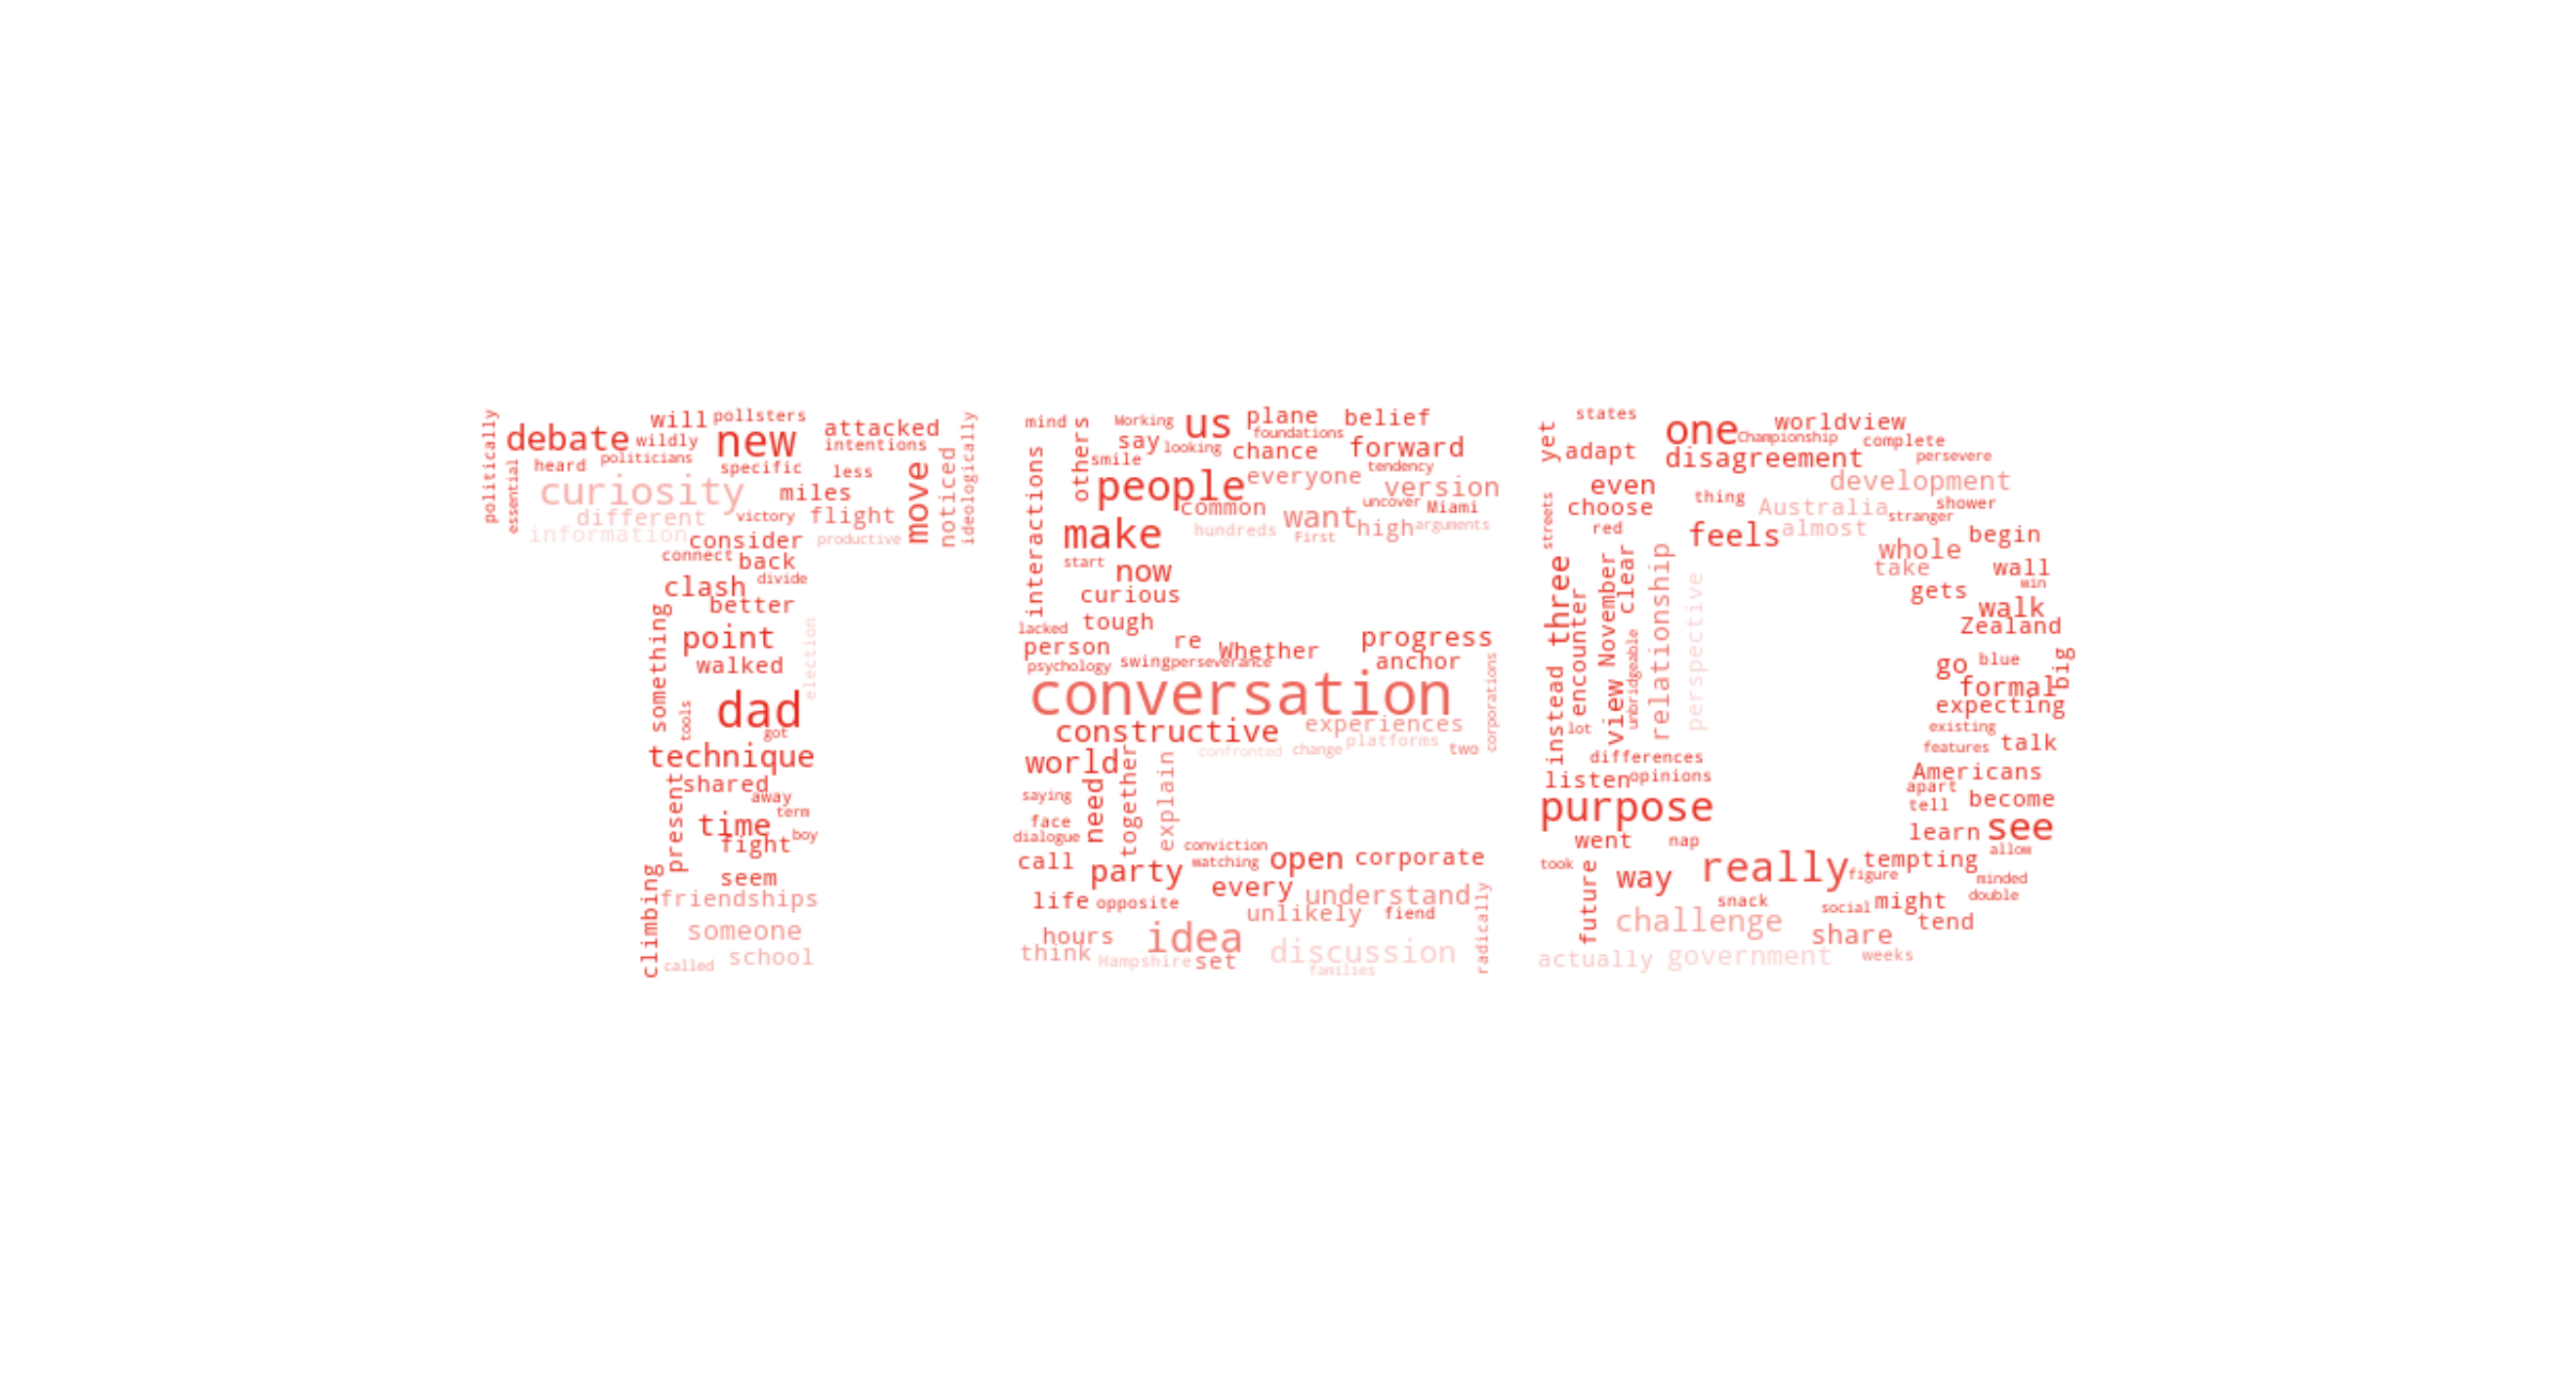

In [37]:
plt.figure(dpi=400)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()